# TIAFI Stats by Operator

[TIAFI's](https://tiafi.org/) stats by operator notebook aims to help an NGO supporting Syrian refugees in Izmir, Turkey to gather insights on the operator activities of the organization's information point service (providing information and assistance to those who struggle with the Turkish language and/or following government guidance). It does this by analyzing the people registered, cases logged and especially vulnerable signed onto the support database for each operator.

## 1) Clean data

### 1.1 Read-in data

In [1]:
# imports libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

# reads in the data
people = pd.read_excel('C:/Users/HUAWEI/Desktop/Projects/TIAFI-Data-Analysis/people_data.xlsx')
cases = pd.read_excel('C:/Users/HUAWEI/Desktop/Projects/TIAFI-Data-Analysis/cases_data.xlsx')
support = pd.read_excel('C:/Users/HUAWEI/Desktop/Projects/TIAFI-Data-Analysis/support_data.xlsx')

# reates a dataframes object for iteration. 
dataframes = ['people', 'cases','support']

# defines how many previous months to include
show_dates = 8

### 1.2 Adjust dates

In [2]:
# creates a list of unique months in datetime format and converts them to string format 
datetimes = people.iloc[:,0].astype("datetime64[M]").unique() # datetime format (from the 1st day)
string_months = [str(date).split('T')[0] for date in datetimes] # string format (from the 1st day)
string_months = string_months[0:show_dates+1] # reduces the dates to the number specified in show_dates

# creates two lists of unique months starting on the 20th and 21st
start = ['-'.join(month.split('-')[0:2]) + '-21' for month in string_months] # (from the 21st day)
end = ['-'.join(month.split('-')[0:2]) + '-20' for month in string_months] # (from the 20th day)

# creates two lists of matching start and end month pairs
start_months = start[1:len(start)]
end_months = end[0:(len(end)-1)]

# reverses the start/end months with most recent last
start_months.reverse()
end_months.reverse()

# creates simplified date labels for plotting
labels = []
for i in range(len(end_months)):
    labels.append(str(end_months[i]).split('-')[1] + '-' + str(end_months[i]).split('-')[0][2:4])
    
# re-assigns start/end dates so that they can be used for numerical filtering
start_months = [''.join(date.split('-')) for date in start_months]
end_months = [''.join(date.split('-')) for date in end_months]

# transforms dataframe dates so that they can be numerically filtered. 
def transform_dates(df):
    temp_dates = df['date'].astype("datetime64[D]")
    df['date'] = [str(date).split(' ')[0] for date in temp_dates]

for i in range(len(dataframes)): 
    transform_dates(eval(dataframes[i]))

## 2) Analyze stats by operator

### 2.1 Return stats by operator function

In [4]:
# disables a set with copy warning
pd.options.mode.chained_assignment = None

def by_operator(df):
    # assigns a new_df
    new_df = eval(df)

    # selects only rows where the operator value is not NA
    new_df = new_df[new_df['operator'].notna()].reset_index(drop=True)

    # coverts all operator initials to lower case for analysis
    new_df.operator = [operator.lower() for operator in new_df.operator]

    # filters for current operators
    current_operators = ['a', 'd', 'm', 'h']
    index = [x in current_operators for x in new_df.operator]
    new_df = new_df[index]

    # creates a subplot
    graph, (plot1) = plt.subplots(1, 1, figsize=(12, 5))

    for operator in range(len(current_operators)):
        data = new_df[new_df.operator==current_operators[operator]]

        totals = []
        for i in range(show_dates):
            data.reset_index(drop=True, inplace=True)
            data.date = [''.join(date.split('-')) for date in data.date]
            index = (len(start_months)-1)-i
            totals.append(sum([date > start_months[index] and date < end_months[index] for date in data.date]))

        totals.reverse()

        d = {'month':labels[len(labels)-show_dates:len(labels)],
             'total':totals}

        new_data = pd.DataFrame(d)
        plot1.plot(new_data.month, new_data.total, label=current_operators[operator]);

    plot1.set_title(df.title() + ' by operator', size=16);
    plot1.set_ylabel(df.title());
    plot1.legend();
    
    return plot1

### 2.2 People by operator

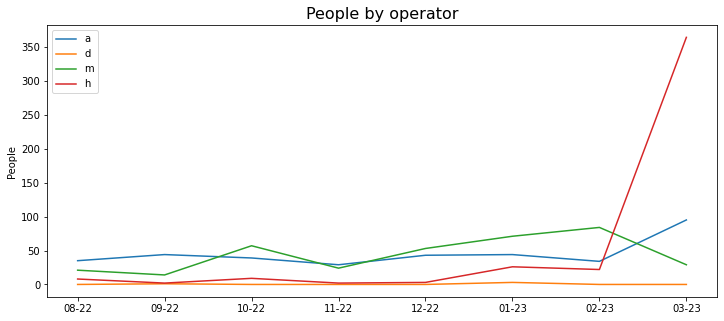

In [5]:
# returns people by operator
by_operator('people');

### 2.3 Cases by operator

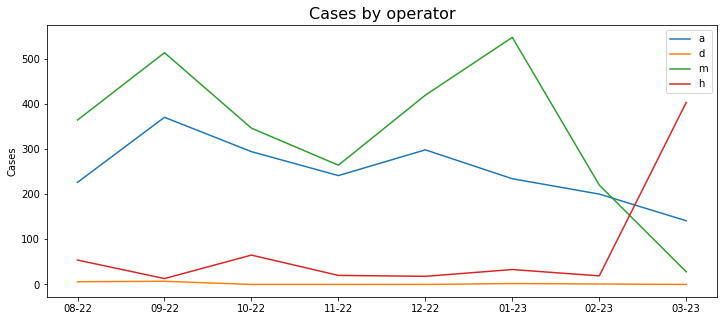

In [6]:
# returns cases by operator
by_operator('cases');

### 2.4 Support by operator

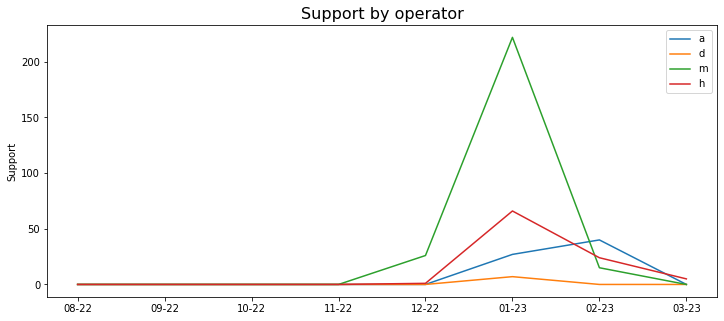

In [7]:
# returns support by operator
by_operator('support');